In [38]:
import pandas as pd
import numpy as np

In [52]:
#  update
origin_df = pd.DataFrame(
    {
        'A':['강다솜','김나영','이강욱'],
        'B':['A','A','A'],
        'C':[1,2,3]
    }
)

update_df = pd.DataFrame(
    {
        'A':['강다솜','김나영','이강욱'],
        'B':['A','A','B'],
        'C':[10,20,30]
    }
)



In [48]:
origin_df.set_index(['A','B'],inplace=True)
update_df.set_index(['A','B'],inplace=True)

In [49]:
origin_df.update(update_df)

In [60]:
pd.merge(origin_df, update_df, left_on=['A','B'], 
         right_on=['A','B'], how='outer')

,A,B,C_x,C_y
0,강다솜,A,1.0,10.0
1,김나영,A,2.0,20.0
2,이강욱,A,3.0,NaN
3,이강욱,B,NaN,30.0


In [82]:
origin_df.replace({'이강욱':'강욱',3:30},inplace=True)

In [83]:
origin_df

,A,B,C
0,강다솜,A,1
1,김나영,A,2
2,강욱,A,30


In [61]:
df = pd.read_csv('https://bit.ly/3RhoNho')

C:\Users\user\AppData\Local\Temp\ipykernel_15944\369920610.py:1: DtypeWarning: Columns (5,6,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('https://bit.ly/3RhoNho')


In [63]:
df.drop(columns=df.columns[-1],inplace=True)

In [66]:
df.isna().sum()

번호              0
도서명           403
저자            201
출판사          4795
발행년도           17
ISBN            0
세트 ISBN    339811
부가기호        76648
권          333415
주제분류번호      20322
도서권수            0
대출건수            0
등록일자            0
dtype: int64

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401682 entries, 0 to 401681
Data columns (total 13 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   번호       401682 non-null  int64 
 1   도서명      401279 non-null  object
 2   저자       401481 non-null  object
 3   출판사      396887 non-null  object
 4   발행년도     401665 non-null  object
 5   ISBN     401682 non-null  object
 6   세트 ISBN  61871 non-null   object
 7   부가기호     325034 non-null  object
 8   권        68267 non-null   object
 9   주제분류번호   381360 non-null  object
 10  도서권수     401682 non-null  int64 
 11  대출건수     401682 non-null  int64 
 12  등록일자     401682 non-null  object
dtypes: int64(3), object(10)
memory usage: 39.8+ MB


In [71]:
(~df.isna()).sum()

번호         401682
도서명        401279
저자         401481
출판사        396887
발행년도       401665
ISBN       401682
세트 ISBN     61871
부가기호       325034
권           68267
주제분류번호     381360
도서권수       401682
대출건수       401682
등록일자       401682
dtype: int64

In [74]:
df.fillna(0).isna().sum()

번호         0
도서명        0
저자         0
출판사        0
발행년도       0
ISBN       0
세트 ISBN    0
부가기호       0
권          0
주제분류번호     0
도서권수       0
대출건수       0
등록일자       0
dtype: int64

In [76]:
np.nan

nan

In [77]:
df.replace(np.nan,0).isna().sum()

번호         0
도서명        0
저자         0
출판사        0
발행년도       0
ISBN       0
세트 ISBN    0
부가기호       0
권          0
주제분류번호     0
도서권수       0
대출건수       0
등록일자       0
dtype: int64

In [90]:
df.도서명.isna().sum()

403

In [93]:
df_ = df.copy()
df_.fillna(0,inplace=True)


ValueError: Cannot mask with non-boolean array containing NA / NaN values

In [98]:
df_.도서명.str.contains('인공지능')

0          True
1         False
2         False
3         False
4         False
          ...  
401677    False
401678    False
401679    False
401680    False
401681    False
Name: 도서명, Length: 401682, dtype: object

In [100]:
aa =df_.도서명.str.contains('인공지능')

In [106]:
aa.size

401682

In [107]:
df_.shape[0]

401682

In [118]:
aa.unique()

array([True, False, nan], dtype=object)

In [120]:
df.도서명.replace(np.nan,'없음',inplace=True)

In [122]:
df.loc[df.도서명.str.contains('인공지능'),['도서명']]

,도서명
0,인공지능과 흙
79,"쉽게 따라하는 인공지능 FOR 클래스룸 (인공지능 윤리, Google Arts & ..."
99,Python으로 배우는 문제해결과 인공지능
888,인공지능 교과서 2
1535,인공지능 시대의 사진 이미지 읽기 (중앙대학교 인문콘텐츠연구소 HK+ 인공지능인문학...
...,...
358336,인공지능
359578,인공지능
368847,똘망똘망 인공지능
371864,왜 인공지능이 문제일까?


In [145]:
person = np.random.choice(['female','male'],size=10000)

In [146]:
score = np.random.randint(50,100,size=(10000,4))

In [147]:
columns = ['gender','korea','english','math','science']

In [148]:
person = pd.DataFrame(person)

In [149]:
person = pd.concat([person,pd.DataFrame(score)],axis=1)
person.columns = columns
person

,gender,korea,english,math,science
0,male,75,99,74,56
1,female,93,62,90,86
2,male,65,93,72,85
3,female,56,72,58,65
4,female,75,56,99,51
...,...,...,...,...,...
9995,male,97,88,76,99
9996,female,83,83,80,95
9997,female,53,74,89,55
9998,female,97,57,96,76


In [151]:
person.dtypes

gender     object
korea       int32
english     int32
math        int32
science     int32
dtype: object

In [158]:
person = np.random.choice(['female','male'],size=10000)
score = np.random.randint(50,100,size=(10000,4))
columns = ['gender','korea','english','math','science']

In [159]:
person = pd.DataFrame(np.c_[person,score],columns=columns)
person

,gender,korea,english,math,science
0,male,50,62,58,81
1,female,72,54,93,87
2,female,96,59,69,60
3,female,99,71,98,87
4,female,98,83,59,84
...,...,...,...,...,...
9995,male,74,52,52,98
9996,male,85,61,95,83
9997,male,99,65,89,74
9998,male,92,79,62,73


In [166]:
#person.update(person.iloc[:,1:].astype(int))

gender     object
korea      object
english    object
math       object
science    object
dtype: object

In [169]:
for i in person.dtypes.index:
    try:
        person[i] = person[i].astype(int)
    except:
        pass

In [171]:
# 총점(total), 평균(avg)
total = person.korea + person.english + person.math + person.science
avg = total/4

In [175]:
# 90 이상은 A, 80이상은 B, 70 이상은 C, 나머지는 D
grade = np.where(avg >= 90,'A',
                  np.where(avg>=80,'B',
                     np.where(avg>=70,'C','D')))

In [184]:
total = []
for i in range(person.shape[0]):
    total.append(person.iloc[i,1:].sum())

In [186]:
total = []
for i in range(person.shape[0]):
    total.append(sum(person.iloc[i,1:]))

In [189]:
col_total = []
for i in range(person.shape[1]-1):
    col_total.append(person.iloc[:,i+1].sum())
col_total

[743719, 744965, 744863, 745305]

In [200]:
#total = person.iloc[:,1:].apply(sum,1)
avg = person.iloc[:,1:].apply(np.mean,1)

In [202]:
person['total'] = total
person['avg'] = avg
person['grade'] = grade

In [ ]:
np.argsort(person.avg)

In [234]:
##1 첫번째 제일 잘한 과목의 점수 best_score
##2 제일 잘한과목명 쓰기
##3 잘한 과목명 순서대로 쓰기
'seience --> math --> korea --> english'
# person.iloc[0,1:5].max()
# person.iloc[:,1:5].apply(np.max,1)
np.argmax(person.iloc[0,1:5])

3

In [259]:
## 1 
person['best_score'] = person.iloc[:,1:5].apply(np.max,1)
person

,gender,korea,english,math,science,total,avg,grade,best_subject,best_score
0,male,50,62,58,81,251,62.75,D,science,81
1,female,72,54,93,87,306,76.50,C,math,93
2,female,96,59,69,60,284,71.00,C,korea,96
3,female,99,71,98,87,355,88.75,B,korea,99
4,female,98,83,59,84,324,81.00,B,korea,98
...,...,...,...,...,...,...,...,...,...,...
9995,male,74,52,52,98,276,69.00,D,science,98
9996,male,85,61,95,83,324,81.00,B,math,95
9997,male,99,65,89,74,327,81.75,B,korea,99
9998,male,92,79,62,73,306,76.50,C,korea,92


In [252]:
# 2
bs = np.argmax(person.iloc[1,1:5]) # 제일잘한 과목이 있는 곳이 어디인가 bs
person.columns[1:5][bs] ## 어디(bs)를 찾았으면 컬럼에 그 위치를 넣어 컬럼명을 찾음

def find_subject(x):
    bs = np.argmax(x)
    return person.columns[1:5][bs]

person['best_subject'] = person.iloc[:,1:5].apply(find_subject,1)

In [272]:
person.columns

Index(['gender', 'korea', 'english', 'math', 'science', 'total', 'avg',
       'grade', 'best_subject', 'best_score'],
      dtype='object')

In [275]:
'-->'.join(person.columns[1:5][np.argsort(person.iloc[2,1:5])[::-1]])
def subject_order(x):
    subject = np.array(['korea','english','math','science'])
    return '-->'.join(subject[np.argsort(x)[::-1]])

In [278]:
np.random.randn(4,3)

array([[-0.06958275, -1.00928778, -2.09598315],
       [-1.23417942, -1.64063993,  0.92632587],
       [-2.34031289, -0.26382207, -0.48187228],
       [-0.43947156, -0.11631106,  0.04679313]])

In [285]:
np.sum(np.random.randn(4,3,5),(1,2)).shape

(3,)

In [286]:
subject_order(person.iloc[2,1:5])

person.iloc[:,1:5].apply(subject_order,1)

0       science-->english-->math-->korea
1       math-->science-->korea-->english
2       korea-->math-->science-->english
3       korea-->math-->science-->english
4       korea-->science-->english-->math
                      ...               
9995    science-->korea-->math-->english
9996    math-->korea-->science-->english
9997    korea-->math-->science-->english
9998    korea-->english-->science-->math
9999    math-->korea-->science-->english
Length: 10000, dtype: object

In [287]:
person['grade_order'] = person.iloc[:,1:5].apply(subject_order,1)

In [ ]:
a = np.random.randint(1,10,100)
a.groupby()

In [291]:
a = pd.DataFrame(np.random.randn(4,5))
a.columns

RangeIndex(start=0, stop=5, step=1)

In [294]:
person.head()

,gender,korea,english,math,science,total,avg,grade,best_subject,best_score,grade_order
0,male,50,62,58,81,251,62.75,D,science,81,science-->english-->math-->korea
1,female,72,54,93,87,306,76.50,C,math,93,math-->science-->korea-->english
2,female,96,59,69,60,284,71.00,C,korea,96,korea-->math-->science-->english
3,female,99,71,98,87,355,88.75,B,korea,99,korea-->math-->science-->english
4,female,98,83,59,84,324,81.00,B,korea,98,korea-->science-->english-->math


In [306]:
tmp_df = person.loc[person.best_subject == i,:].sum()[["korea","english"]]

In [341]:
# groupby : split(컬럼), apply, combine
group_df = pd.DataFrame(columns=['best_subject','korea','english'])
for i in person.best_subject.unique():
    tmp_df = person.loc[person.best_subject == i,:].sum()[["korea","english"]]
    tmp_df = pd.DataFrame(
        {
            'best_subject':[i],
            'korea':tmp_df.values[[0]],
            'english':tmp_df.values[[1]]
        }
    )
    group_df = pd.concat([group_df,tmp_df])
group_df.set_index('best_subject')

person.groupby(['best_subject']).sum()[['korea','english']]

,korea,english
best_subject,,
science,161165,161423
math,170265,171521
korea,236021,183706
english,176268,228315


In [345]:
person

,gender,korea,english,math,science,total,avg,grade,best_subject,best_score,grade_order
0,male,50,62,58,81,251,62.75,D,science,81,science-->english-->math-->korea
1,female,72,54,93,87,306,76.50,C,math,93,math-->science-->korea-->english
2,female,96,59,69,60,284,71.00,C,korea,96,korea-->math-->science-->english
3,female,99,71,98,87,355,88.75,B,korea,99,korea-->math-->science-->english
4,female,98,83,59,84,324,81.00,B,korea,98,korea-->science-->english-->math
...,...,...,...,...,...,...,...,...,...,...,...
9995,male,74,52,52,98,276,69.00,D,science,98,science-->korea-->math-->english
9996,male,85,61,95,83,324,81.00,B,math,95,math-->korea-->science-->english
9997,male,99,65,89,74,327,81.75,B,korea,99,korea-->math-->science-->english
9998,male,92,79,62,73,306,76.50,C,korea,92,korea-->english-->science-->math


In [347]:
person.describe() ## 수치형
person[["gender","best_subject","grade_order","grade"]].describe() ## object type

,gender,best_subject,grade_order,grade
count,10000,10000,10000,10000
unique,2,4,24,4
top,male,korea,science-->math-->english-->korea,C
freq,5066,2633,487,5013


In [348]:
person.describe()

,korea,english,math,science,total,avg,best_score
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,74.371900,74.49650,74.486300,74.530500,297.885200,74.471300,89.514600
std,14.519748,14.45157,14.532905,14.364912,28.784146,7.196037,8.179797
min,50.000000,50.00000,50.000000,50.000000,210.000000,52.500000,54.000000
25%,62.000000,62.00000,62.000000,62.000000,278.000000,69.500000,85.000000
50%,74.000000,74.00000,74.000000,75.000000,298.000000,74.500000,92.000000
75%,87.000000,87.00000,87.000000,87.000000,318.000000,79.500000,96.000000
max,99.000000,99.00000,99.000000,99.000000,388.000000,97.000000,99.000000


In [358]:
person.groupby(['grade_order']).count().korea
person.groupby(['gender','grade']).agg(['mean','sum','count'])
person.groupby(['gender','grade']).agg(['mean','sum','count']).korea['count'].sum()

10000

In [360]:
### person 데이터 가장 잘한 과목이 영어와 국어인 데이터를 제외하고 
## 남자 여자의 영어, 수학의 평균을 구하면??
person.loc[~((person.best_subject == 'korea') | (person.best_subject == 'english')) ].groupby(['gender']).mean()[["english","math"]]

### person 데이터 가장 잘한 과목이 영어와 국어 과학인 데이터를 제외하고 
## 남자 여자의 영어, 수학의 평균을 구하면??



,english,math
gender,,
female,69.013180,79.973214
male,69.303412,79.476036


In [369]:
x = pd.DataFrame(np.random.choice([ i for i in 'abcdefgh'], 1000))
x.columns = ['col']

In [375]:
x.loc[(x.col == 'a') | (x.col == 'b') | (x.col == 'c' ) | (x.col == 'd') ,:].shape[0]
x.loc[x.col.isin(['a','b','c','d']),:]

,col
3,b
4,a
7,a
13,b
15,b
...,...
993,a
994,b
995,a
997,a


In [ ]:
"""
select korea, english
from person
where best_subject = 'korea' or best_subject = 'english'
group by gender
"""

In [382]:
person.loc[(person.best_subject == 'korea') & (person.best_subject == 'english'),:]
stmt = "best_subject == 'korea' or best_subject == 'english'"
person.query(stmt)[["gender","science","total"]].groupby(['gender']).mean().reset_index()

,gender,science,total
0,female,70.113091,298.672734
1,male,70.198157,298.794547


In [342]:
import warnings
warnings.filterwarnings(action='ignore')
person.groupby(['best_subject']).sum()[['korea','english']]

,korea,english
best_subject,,
english,176268,228315
korea,236021,183706
math,170265,171521
science,161165,161423


In [388]:
(person.korea > person.describe().loc['25%','korea']) & (person.english > person.describe().loc['50%','english'])

3605

{'whiskers': [<matplotlib.lines.Line2D at 0x1de9d06a5d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1de9d078050>,
 'boxes': [<matplotlib.lines.Line2D at 0x1de9cfefbd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1de9d079850>],
 'fliers': [<matplotlib.lines.Line2D at 0x1de9d07a350>],
 'means': []}

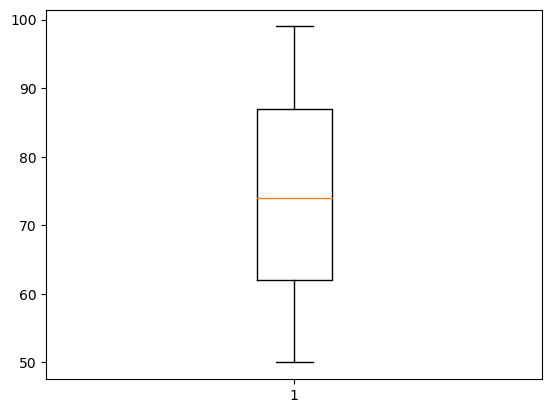

In [390]:
import matplotlib.pyplot as plt
plt.boxplot(person.korea)

{'whiskers': [<matplotlib.lines.Line2D at 0x1de9d3164d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1de9d317310>,
 'boxes': [<matplotlib.lines.Line2D at 0x1de9d315c50>],
 'medians': [<matplotlib.lines.Line2D at 0x1de9d320850>],
 'fliers': [<matplotlib.lines.Line2D at 0x1de9d2defd0>],
 'means': []}

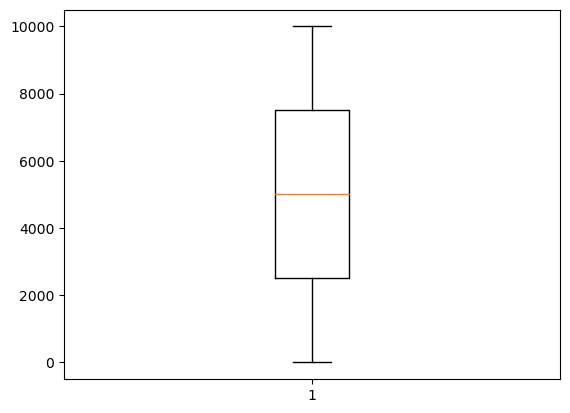

In [395]:
plt.boxplot(np.arange(10000))

In [396]:
person.describe(percentiles=[0.3,0.6,0.9])

,korea,english,math,science,total,avg,best_score
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,74.371900,74.49650,74.486300,74.530500,297.885200,74.471300,89.514600
std,14.519748,14.45157,14.532905,14.364912,28.784146,7.196037,8.179797
min,50.000000,50.00000,50.000000,50.000000,210.000000,52.500000,54.000000
30%,64.000000,65.00000,64.000000,65.000000,282.000000,70.500000,87.000000
50%,74.000000,74.00000,74.000000,75.000000,298.000000,74.500000,92.000000
60%,79.000000,79.00000,80.000000,80.000000,305.000000,76.250000,94.000000
90%,95.000000,95.00000,95.000000,94.000000,336.000000,84.000000,98.000000
max,99.000000,99.00000,99.000000,99.000000,388.000000,97.000000,99.000000


In [398]:
np.percentile(person.korea,30)

64.0

In [404]:
x = range(1,100)

In [400]:
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [406]:
n = 100
prob = []
for i in x:
    prob.append(i*(100-i)/10000)

In [407]:
prob

[0.0099,
 0.0196,
 0.0291,
 0.0384,
 0.0475,
 0.0564,
 0.0651,
 0.0736,
 0.0819,
 0.09,
 0.0979,
 0.1056,
 0.1131,
 0.1204,
 0.1275,
 0.1344,
 0.1411,
 0.1476,
 0.1539,
 0.16,
 0.1659,
 0.1716,
 0.1771,
 0.1824,
 0.1875,
 0.1924,
 0.1971,
 0.2016,
 0.2059,
 0.21,
 0.2139,
 0.2176,
 0.2211,
 0.2244,
 0.2275,
 0.2304,
 0.2331,
 0.2356,
 0.2379,
 0.24,
 0.2419,
 0.2436,
 0.2451,
 0.2464,
 0.2475,
 0.2484,
 0.2491,
 0.2496,
 0.2499,
 0.25,
 0.2499,
 0.2496,
 0.2491,
 0.2484,
 0.2475,
 0.2464,
 0.2451,
 0.2436,
 0.2419,
 0.24,
 0.2379,
 0.2356,
 0.2331,
 0.2304,
 0.2275,
 0.2244,
 0.2211,
 0.2176,
 0.2139,
 0.21,
 0.2059,
 0.2016,
 0.1971,
 0.1924,
 0.1875,
 0.1824,
 0.1771,
 0.1716,
 0.1659,
 0.16,
 0.1539,
 0.1476,
 0.1411,
 0.1344,
 0.1275,
 0.1204,
 0.1131,
 0.1056,
 0.0979,
 0.09,
 0.0819,
 0.0736,
 0.0651,
 0.0564,
 0.0475,
 0.0384,
 0.0291,
 0.0196,
 0.0099]

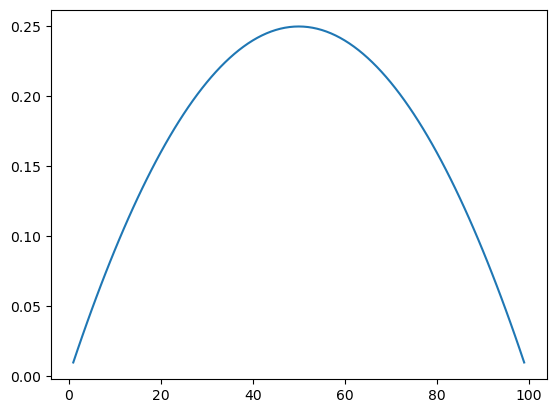

In [408]:
plt.plot(x,prob)